In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
data_csv=!ls -lrt *.csv | awk '{print $9}'

In [3]:
!head -n 5 {data_csv[0]}

time_ns,v_bkg,v_tot,v_sig
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0


In [4]:
data_csv[1].split('_')[2].split('.')[0]

'0001'

In [5]:
#df_l=[pd.read_csv(data_csv[i],
#                  names=['time_ns',
#                         'v_bkg_' + data_csv[i].split('_')[2].split('.')[0],
#                         'v_tot_' + data_csv[i].split('_')[2].split('.')[0],
#                         'v_sig_' + data_csv[i].split('_')[2].split('.')[0]],
#                  index_col='time_ns') for i in range(0,len(data_csv))]
df_l=[pd.read_csv(data_csv[i],index_col='time_ns') for i in range(0,len(data_csv))]

In [6]:
for i in range(0,len(df_l)):
    df_l[i].drop(labels=['v_tot','v_sig'],axis=1,inplace=True)

In [14]:
df_l

[           v_bkg    5ns  10ns  15ns  20ns  25ns  30ns
 time_ns                                              
 0        0.00000      0     0     0     0     0     0
 1        0.00000      0     0     0     0     0     0
 2        0.00000      0     0     0     0     0     0
 3        0.00000      0     0     0     0     0     0
 4        0.00000      0     0     0     0     0     0
 ...          ...    ...   ...   ...   ...   ...   ...
 99995    1.89871  19999  9999  6666  4999  3999  3333
 99996    1.89077  19999  9999  6666  4999  3999  3333
 99997    1.88283  19999  9999  6666  4999  3999  3333
 99998    1.87489  19999  9999  6666  4999  3999  3333
 99999    1.86695  19999  9999  6666  4999  3999  3333
 
 [100000 rows x 7 columns],
            v_bkg    5ns  10ns  15ns  20ns  25ns  30ns
 time_ns                                              
 0        0.00000      0     0     0     0     0     0
 1        0.00000      0     0     0     0     0     0
 2        0.00000      0     0     

In [7]:
for i in range(0,len(df_l)):
    df_l[i]['5ns']=df_l[i].index.map(lambda x: int(int(x)/int(5)))
    df_l[i]['10ns']=df_l[i].index.map(lambda x: int(int(x)/int(10)))
    df_l[i]['15ns']=df_l[i].index.map(lambda x: int(int(x)/int(15)))
    df_l[i]['20ns']=df_l[i].index.map(lambda x: int(int(x)/int(20)))
    df_l[i]['25ns']=df_l[i].index.map(lambda x: int(int(x)/int(25)))
    df_l[i]['30ns']=df_l[i].index.map(lambda x: int(int(x)/int(30)))

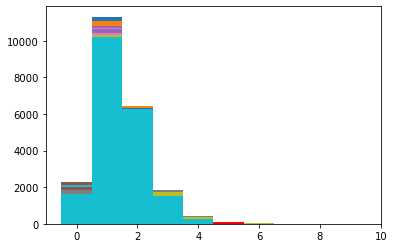

In [8]:
n_4pe=[]
for i in range(0,len(df_l)):
    val, bins, patch = plt.hist(x=df_l[i].groupby('5ns').max()['v_bkg'],bins=np.linspace(0.0,10,11)-0.5)
    plt.setp(patch[5], 'facecolor', 'r')
    n_4pe.append(val[5])
    #plt.show()
    #print(val[4])

57.81
578100.0


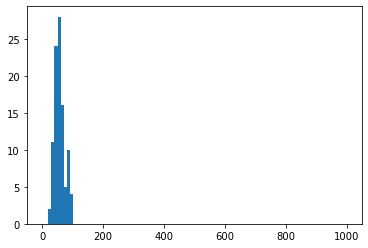

In [9]:
plt.hist(np.array(n_4pe),bins=np.linspace(0.0,1000,100));
print(np.array(n_4pe).mean())
#292.4 in
print(np.array(n_4pe).mean()*1e+9/len(df_l[0]))

<AxesSubplot:>

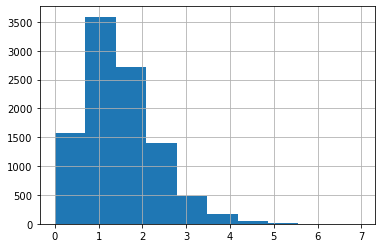

In [10]:
df_l[i].groupby('10ns').max()['v_bkg'].hist()

In [11]:
np.linspace(-0.5,10.5,11)

array([-0.5,  0.6,  1.7,  2.8,  3.9,  5. ,  6.1,  7.2,  8.3,  9.4, 10.5])

<AxesSubplot:xlabel='time_ns'>

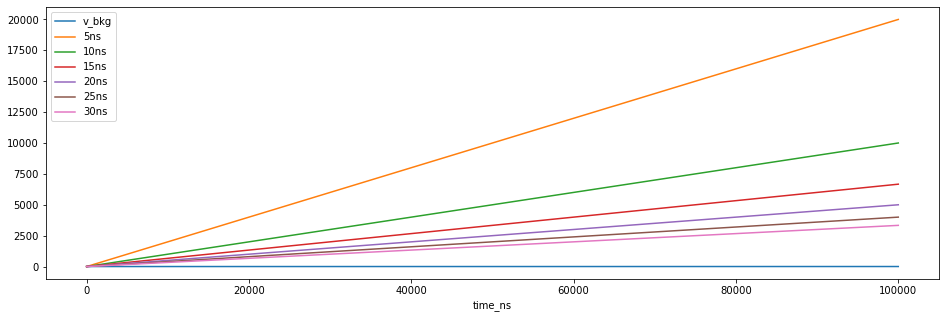

In [12]:
df_l[0].plot(figsize=(16,5))

In [13]:
for i in range(0,len(data_csv)):
    df_l[i]['v_sig'].plot(figsize=(16,5),xlim=(5000,6100),c='r',alpha=0.1)

KeyError: 'v_sig'

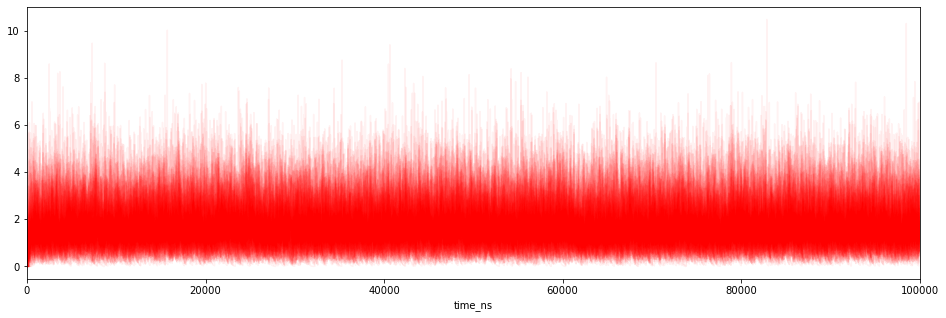

In [15]:
for i in range(0,len(data_csv)):
    df_l[i]['v_bkg'].plot(figsize=(16,5),xlim=(0,100000),c='r',alpha=0.05)

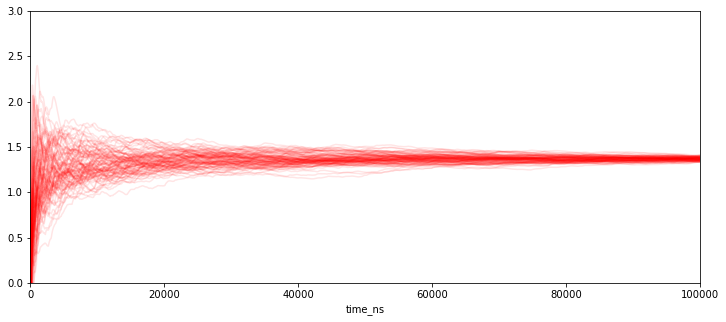

In [16]:
for i in range(0,len(data_csv)):
    df_l[i]['v_bkg'].expanding(min_periods=1).mean().plot(figsize=(12,5),
                                                          xlim=(0.0,100000),
                                                          ylim=(0.0,3.0),c='r',alpha=0.1);

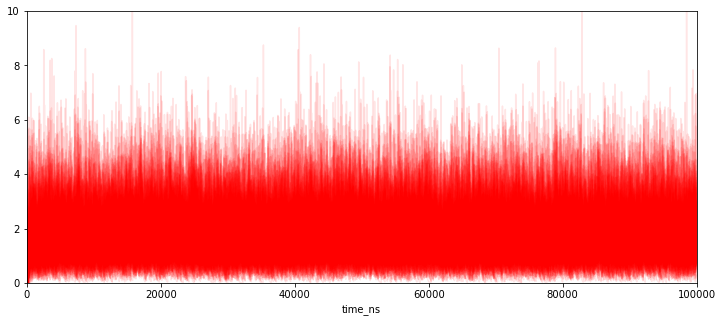

In [17]:
for i in range(0,len(data_csv)):
    df_l[i]['v_bkg'].rolling(window=25).max().plot(figsize=(12,5),
                                                   xlim=(0.0,100000),
                                                   ylim=(0.0,10.0),c='r',alpha=0.1);

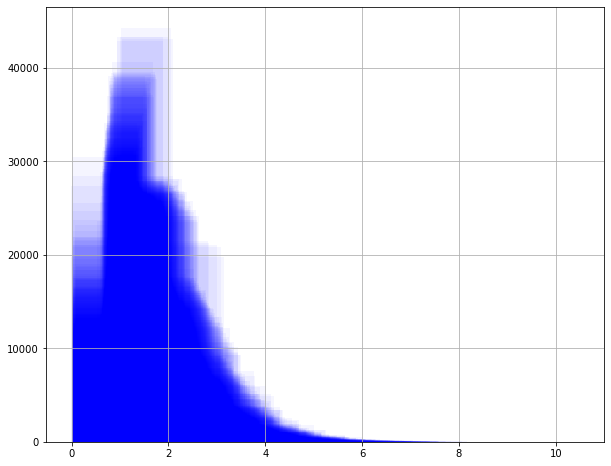

In [18]:
for i in range(0,len(data_csv)):
    df_l[i]['v_bkg'].rolling(window=25).max().hist(figsize=(10,8),color='b',alpha=0.04);

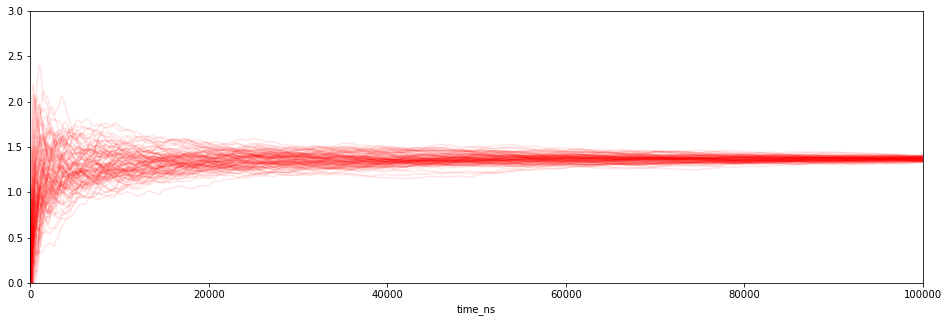

In [19]:
for i in range(0,len(data_csv)):
    df_l[i][(df_l[i].index>0)]['v_bkg'].expanding(min_periods=1).mean().plot(figsize=(16,5),
                                                          xlim=(0.0,100000),
                                                          ylim=(0.0,3.0),c='r',alpha=0.1);

<AxesSubplot:xlabel='time_ns'>

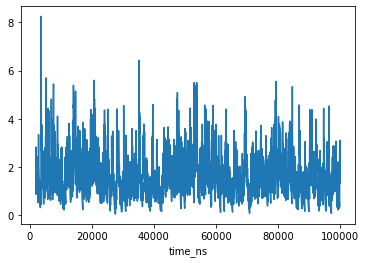

In [20]:
df_l[0][(df_l[0].index>2000)]['v_bkg'].plot()

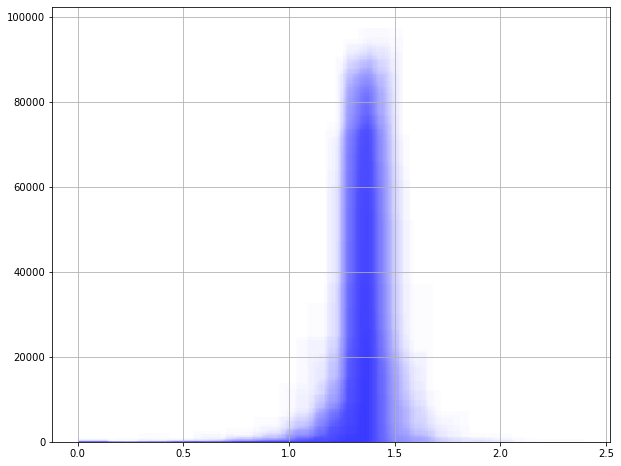

In [21]:
for i in range(0,len(data_csv)):
    df_l[i][(df_l[0].index>0)]['v_bkg'].expanding(min_periods=1).mean().hist(figsize=(10,8),
                                                                                 color='b',
                                                                                 alpha=0.01);

In [22]:
df_l[0].join(df_l[1]);

ValueError: columns overlap but no suffix specified: Index(['v_bkg', '5ns', '10ns', '15ns', '20ns', '25ns', '30ns'], dtype='object')

In [23]:
df_l[0]

,v_bkg,5ns,10ns,15ns,20ns,25ns,30ns
time_ns,,,,,,,
0,0.00000,0,0,0,0,0,0
1,0.00000,0,0,0,0,0,0
2,0.00000,0,0,0,0,0,0
3,0.00000,0,0,0,0,0,0
4,0.00000,0,0,0,0,0,0
...,...,...,...,...,...,...,...
99995,1.89871,19999,9999,6666,4999,3999,3333
99996,1.89077,19999,9999,6666,4999,3999,3333
99997,1.88283,19999,9999,6666,4999,3999,3333
